<a href="https://colab.research.google.com/github/sanskarpyml/Lung-cancer-survival-prediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies



In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#datafram into tabular form
dataset = pd.read_csv("dataset_med.csv")

In [110]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [112]:
dataset["gender"].value_counts()

,count
gender,
Male,445134
Female,444866


In [113]:
dataset["cancer_stage"].value_counts()

,count
cancer_stage,
Stage III,222594
Stage IV,222527
Stage I,222516
Stage II,222363


In [114]:
dataset["smoking_status"].value_counts()

,count
smoking_status,
Passive Smoker,223170
Never Smoked,222751
Former Smoker,222181
Current Smoker,221898


In [115]:
dataset["cirrhosis"].value_counts()

,count
cirrhosis,
0,688899
1,201101


# DATA PREPROCESSING AND DATA CLEANING


In [116]:
#removing "id" and "country" features
dataset.drop(["id", "country"], axis=1, inplace=True)

In [117]:
#checking for the null value in each column
dataset.isnull().sum()

,0
age,0
gender,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0
asthma,0


In [118]:
#removing those column having null values
dataset.dropna(inplace=True)

In [119]:
dataset.isnull().sum()

,0
age,0
gender,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0
asthma,0


#Changing binary feature as 0 and 1


In [120]:
#labeling gender Male as 0 and Female as 1
dataset["gender"] = dataset["gender"].map({"Male":0, "Female":1})

In [121]:
#labing family_history yes as 1 and No as 0
dataset["family_history"] = dataset["family_history"].map({"Yes":0, "No":1})

In [122]:
dataset["treatment_type"].value_counts()

,count
treatment_type,
Chemotherapy,223262
Surgery,223261
Combined,222609
Radiation,220868


#Changing multi feature column with one hot encoding

In [123]:
#one_hot encoding for multiclass features
dataset = pd.get_dummies(dataset, columns=["cancer_stage", "smoking_status", "treatment_type"], drop_first=False)

In [124]:
dataset = dataset.replace({'True': 1, 'False': 0, True: 1, False: 0})

/tmp/ipython-input-124-1938368688.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'True': 1, 'False': 0, True: 1, False: 0})


#replacing diagnosis_date and end_treatment_date with treatment_duration

In [125]:
# Remove leading/trailing whitespaces
dataset['diagnosis_date'] = dataset['diagnosis_date'].str.strip()
dataset['end_treatment_date'] = dataset['end_treatment_date'].str.strip()

# Convert string to datetime
dataset['diagnosis_date'] = pd.to_datetime(dataset['diagnosis_date'], format='%Y-%m-%d', errors='coerce')
dataset['end_treatment_date'] = pd.to_datetime(dataset['end_treatment_date'], format='%Y-%m-%d', errors='coerce')

# Calculate duration
dataset['treatment_duration'] = (dataset['end_treatment_date'] - dataset['diagnosis_date']).dt.days


In [126]:
dataset.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)


In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            890000 non-null  float64
 1   gender                         890000 non-null  int64  
 2   family_history                 890000 non-null  int64  
 3   bmi                            890000 non-null  float64
 4   cholesterol_level              890000 non-null  int64  
 5   hypertension                   890000 non-null  int64  
 6   asthma                         890000 non-null  int64  
 7   cirrhosis                      890000 non-null  int64  
 8   other_cancer                   890000 non-null  int64  
 9   survived                       890000 non-null  int64  
 10  cancer_stage_Stage I           890000 non-null  int64  
 11  cancer_stage_Stage II          890000 non-null  int64  
 12  cancer_stage_Stage III        

In [128]:
dataset.head()

,age,gender,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,...,cancer_stage_Stage IV,smoking_status_Current Smoker,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Chemotherapy,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,treatment_duration
0,64.0,0,0,29.4,199,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,523
1,50.0,1,0,41.2,280,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,424
2,65.0,1,0,44.0,268,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,370
3,51.0,1,1,43.0,241,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,443
4,37.0,0,1,19.7,178,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,406


#train and test splitting

In [129]:
X = dataset.drop('survived', axis=1)  # All features
y = dataset['survived']               # Target variable

In [130]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class distribution balanced
)


#training the model

In [131]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:13:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [132]:
#predection with test dataset
y_pred = xgb_model.predict(X_test)

In [133]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7797303370786517

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138799
           1       0.29      0.00      0.00     39201

    accuracy                           0.78    178000
   macro avg       0.54      0.50      0.44    178000
weighted avg       0.67      0.78      0.68    178000


Confusion Matrix:
 [[138787     12]
 [ 39196      5]]


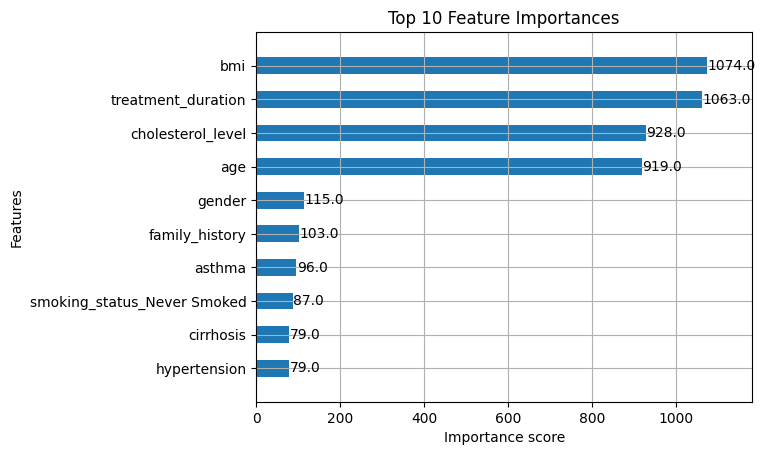

In [134]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances")
plt.savefig("feature_importance.png")
